In [62]:
# import relevant libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import table 


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

sns.set()

In [63]:
# load dataset
df = pd.read_csv('car-pricing-data.csv')
pd.set_option('display.max_columns', None)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [64]:
# depentdent variables are the features of the dataset 
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [65]:
# shape of the dataframe
df.shape

(8128, 12)

In [66]:
# Check the rows with missing values (if any)
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [67]:
# drop missing rows
df.dropna(inplace=True)

In [68]:
# convert year to age
df['year'] = df['year'].map(lambda x: 2020 - x)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,6,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,6,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,14,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,10,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,13,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [69]:
# info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7907 non-null   object 
 1   year           7907 non-null   int64  
 2   selling_price  7907 non-null   int64  
 3   km_driven      7907 non-null   int64  
 4   fuel           7907 non-null   object 
 5   seller_type    7907 non-null   object 
 6   transmission   7907 non-null   object 
 7   owner          7907 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7907 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 803.1+ KB


In [70]:
# describing the dataframe
df.describe()

,year,selling_price,km_driven,seats
count,7907.000000,7.907000e+03,7.907000e+03,7907.000000
mean,6.017832,6.497417e+05,6.919256e+04,5.416719
std,3.866650,8.135565e+05,5.678976e+04,0.959588
min,0.000000,2.999900e+04,1.000000e+00,2.000000
25%,3.000000,2.700000e+05,3.500000e+04,5.000000
50%,5.000000,4.500000e+05,6.000000e+04,5.000000
75%,8.000000,6.900000e+05,9.575000e+04,5.000000
max,26.000000,1.000000e+07,2.360457e+06,14.000000


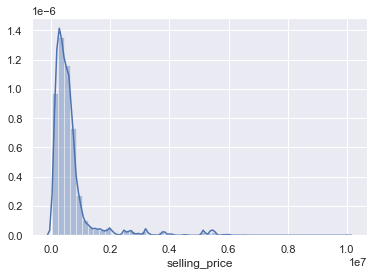

In [71]:
# plotting the distribution of the selling price
sns.distplot(df['selling_price'])

In [72]:
# data cleaning

df['mileage'] = df['mileage'].str.replace('kmpl', '')
df['engine'] = df['engine'].str.replace('CC', '')
df['max_power'] = df['max_power'].str.replace('bhp', '')
df['mileage'] = df['mileage'].str.replace('km/kg', '')

df = df.drop(columns=['name'])

df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,6,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0
1,6,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,14,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0
3,10,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0
4,13,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0


In [73]:
# data cleaning

df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')
df['engine'] = pd.to_numeric(df['engine'], errors='coerce')
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')

In [74]:
# data cleaning

df.isnull().sum()
df.dropna(inplace=True)

In [75]:

df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,6,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0
1,6,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,14,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0
3,10,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0
4,13,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0


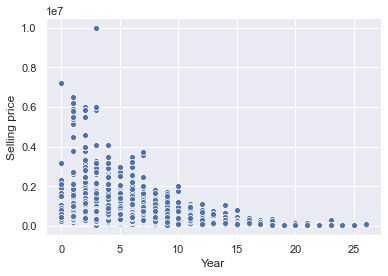

In [56]:
# plotting dependent variables with respect to price

plt1 = sns.scatterplot(x = 'year', y = 'selling_price', data = df)
plt1.set_xlabel('Year')
plt1.set_ylabel('Selling price')
plt.show()

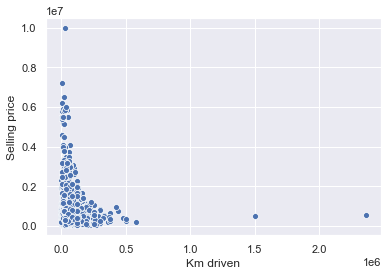

In [17]:
# plotting dependent variables with respect to price

plt1 = sns.scatterplot(x = 'km_driven', y = 'selling_price', data = df)
plt1.set_xlabel('Km driven')
plt1.set_ylabel('Selling price')
plt.show()

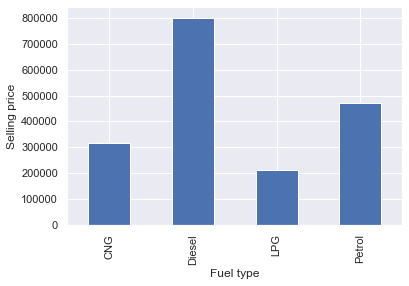

In [18]:
# plotting dependent variables with respect to price

df_fuel_avg_price = df[['fuel','selling_price']].groupby("fuel", as_index = False).mean().rename(columns={'selling_price':'fuel_avg_price'})
plt1 = df_fuel_avg_price.plot(x = 'fuel', kind='bar', sort_columns = True,legend = False,)
plt1.set_xlabel("Fuel type")
plt1.set_ylabel("Selling price")
plt.show()

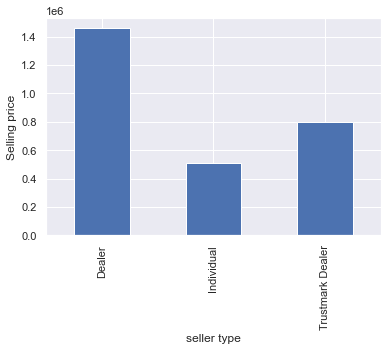

In [19]:
# plotting dependent variables with respect to price

df_seller_type_avg_price = df[['seller_type','selling_price']].groupby("seller_type", as_index = False).mean().rename(columns={'selling_price':'seller_avg_price'})
plt1 = df_seller_type_avg_price.plot(x = 'seller_type', kind='bar', sort_columns = True,legend = False,)
plt1.set_xlabel("seller type")
plt1.set_ylabel("Selling price")
plt.show()

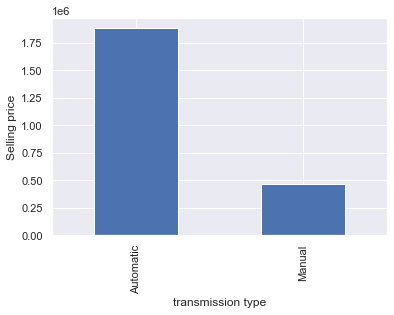

In [20]:
# plotting dependent variables with respect to price

df_transmission_avg_price = df[['transmission','selling_price']].groupby("transmission", as_index = False).mean().rename(columns={'selling_price':'tranmission_avg_price'})
plt1 = df_transmission_avg_price.plot(x = 'transmission', kind='bar', sort_columns = True,legend = False,)
plt1.set_xlabel("transmission type")
plt1.set_ylabel("Selling price")
plt.show()

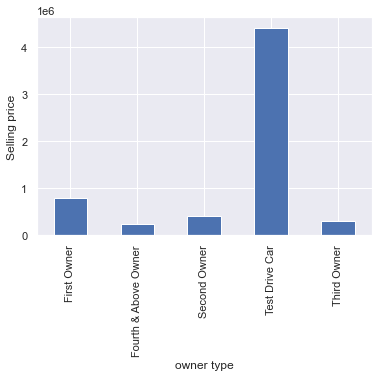

In [21]:
# plotting dependent variables with respect to price

df_owner_avg_price = df[['owner','selling_price']].groupby("owner", as_index = False).mean().rename(columns={'selling_price':'owner_avg_price'})
plt1 = df_owner_avg_price.plot(x = 'owner', kind='bar', sort_columns = True,legend = False,)
plt1.set_xlabel("owner type")
plt1.set_ylabel("Selling price")
plt.show()

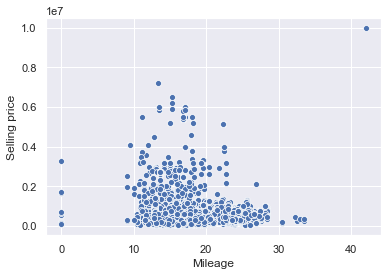

In [22]:
# plotting dependent variables with respect to price

plt1 = sns.scatterplot(x = 'mileage', y = 'selling_price', data = df)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Selling price')
plt.show()

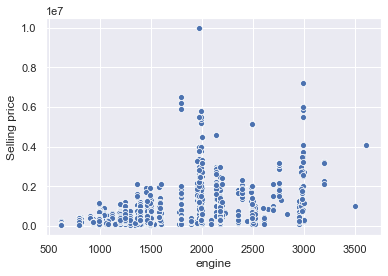

In [23]:
# plotting dependent variables with respect to price

plt1 = sns.scatterplot(x = 'engine', y = 'selling_price', data = df)
plt1.set_xlabel('engine')
plt1.set_ylabel('Selling price')
plt.show()

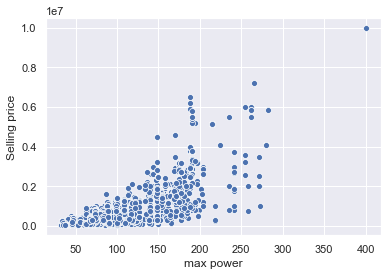

In [24]:
# plotting dependent variables with respect to price

plt1 = sns.scatterplot(x = 'max_power', y = 'selling_price', data = df)
plt1.set_xlabel('max power')
plt1.set_ylabel('Selling price')
plt.show()

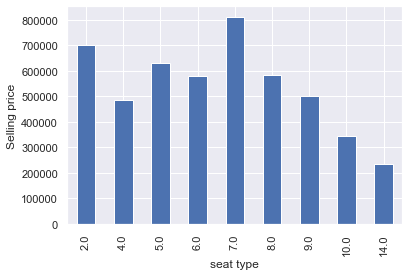

In [25]:
# plotting dependent variables with respect to price

df_seats_avg_price = df[['seats','selling_price']].groupby("seats", as_index = False).mean().rename(columns={'selling_price':'seats_avg_price'})
plt1 = df_seats_avg_price.plot(x = 'seats', kind='bar', sort_columns = True,legend = False,)
plt1.set_xlabel("seat type")
plt1.set_ylabel("Selling price")
plt.show()

<Figure size 1800x1800 with 0 Axes>

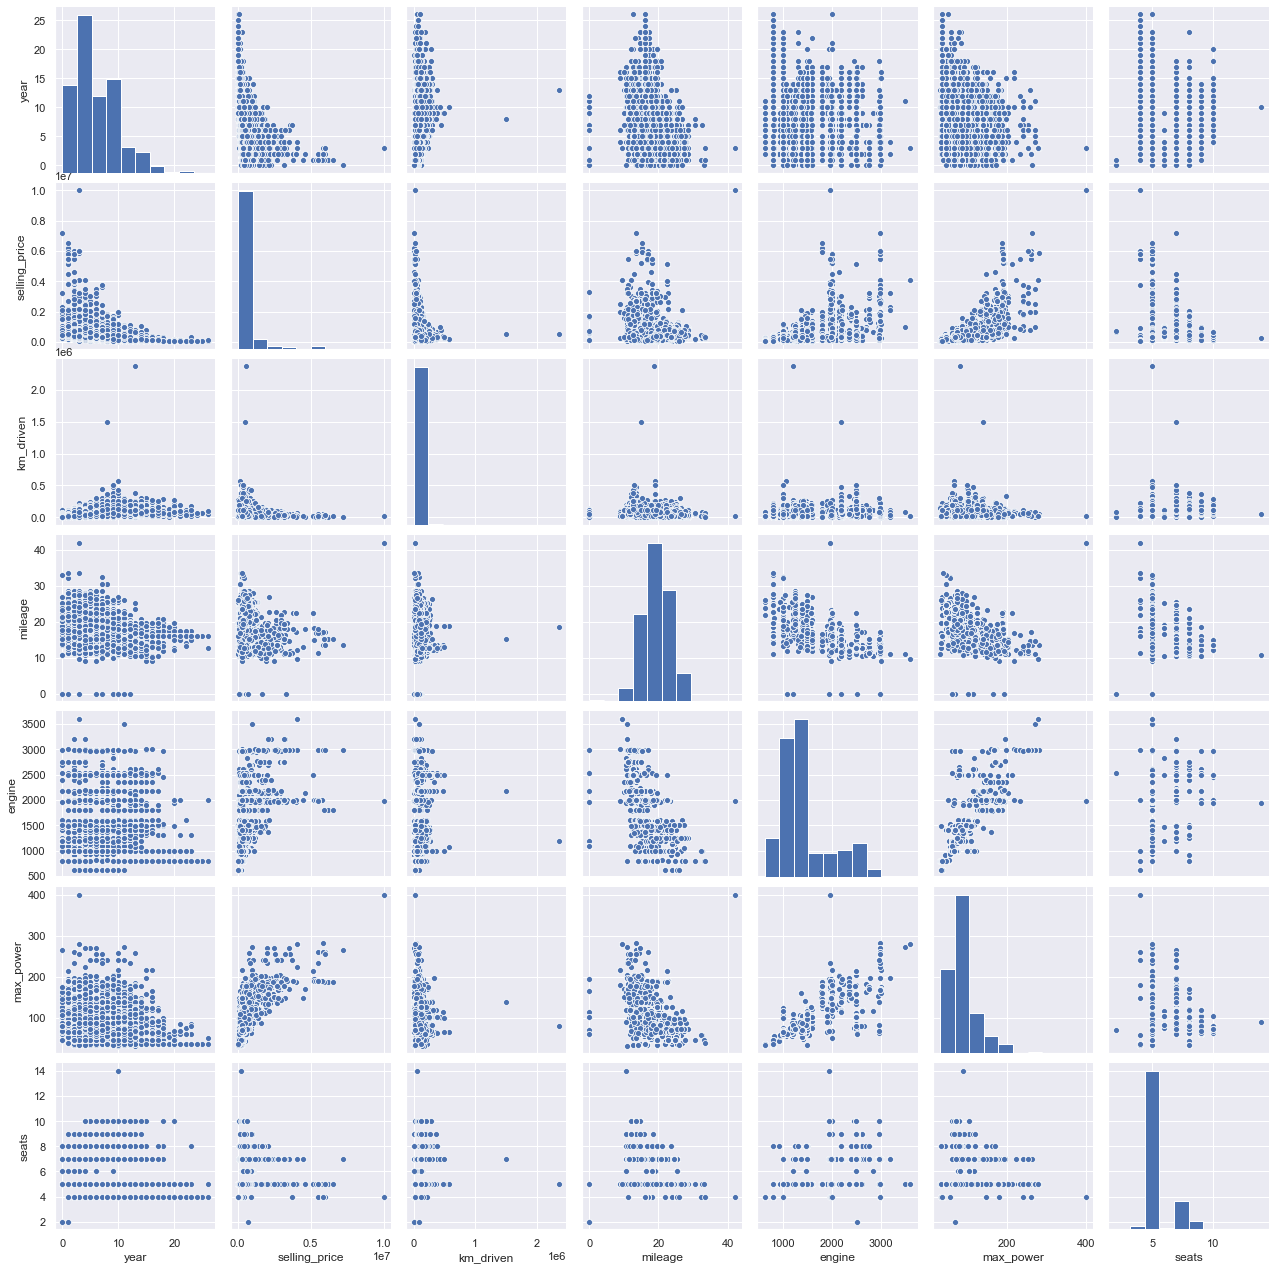

In [26]:
# plotting all variables with each other

plt.figure(figsize=(25, 25))
sns.pairplot(df)
plt.show()

In [76]:
# convert categorical values to dummy columns used to numerically represent categorical values
df = pd.get_dummies(df, columns =['fuel', 'seller_type', 'transmission', 'owner'])

In [77]:
# put selling price at the end columnn to better anaylze
cols = [col for col in df if col != 'selling_price'] +  ['selling_price']
df = df[cols]

In [78]:
# printing correlations table
df.corr(method='pearson')


,year,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,selling_price
year,1.000000,0.428548,-0.328544,-0.018263,-0.226598,0.007923,-0.029095,-0.037536,0.059887,0.034351,-0.214525,0.243729,-0.100385,-0.249002,0.249002,-0.491934,0.205631,0.317328,-0.032661,0.271317,-0.412302
km_driven,0.428548,1.000000,-0.172980,0.206031,-0.038159,0.227259,-0.005432,0.271662,0.023095,-0.274460,-0.178725,0.202851,-0.083181,-0.201186,0.201186,-0.295470,0.089244,0.209913,-0.024168,0.148795,-0.222158
mileage,-0.328544,-0.172980,1.000000,-0.576408,-0.374621,-0.451700,0.100821,0.060256,-0.013924,-0.074927,0.004940,0.011862,-0.036248,-0.178986,0.178986,0.166438,-0.072118,-0.101811,-0.015644,-0.097455,-0.126280
engine,-0.018263,0.206031,-0.576408,1.000000,0.703975,0.611103,-0.059850,0.507383,-0.056681,-0.491189,0.124104,-0.132215,0.038690,0.283206,-0.283206,-0.015510,-0.006433,0.020809,0.013954,-0.004743,0.455682
max_power,-0.226598,-0.038159,-0.374621,0.703975,1.000000,0.191999,-0.069644,0.304787,-0.060175,-0.286090,0.297039,-0.286493,0.026493,0.541870,-0.541870,0.114942,-0.037283,-0.085206,0.049734,-0.054249,0.749674
seats,0.007923,0.227259,-0.451700,0.611103,0.191999,1.000000,-0.038587,0.354764,-0.028949,-0.345399,-0.074086,0.081197,-0.028106,-0.072722,0.072722,-0.035481,0.007845,0.033751,-0.010921,0.005175,0.041617
fuel_CNG,-0.029095,-0.005432,0.100821,-0.059850,-0.069644,-0.038587,1.000000,-0.088831,-0.005426,-0.072894,-0.032833,0.036808,-0.014273,-0.031686,0.031686,-0.004295,-0.000582,0.009838,-0.002047,-0.008627,-0.033197
fuel_Diesel,-0.037536,0.271662,0.060256,0.507383,0.304787,0.354764,-0.088831,1.000000,-0.072800,-0.978020,0.065171,0.003567,-0.140763,-0.025579,0.025579,-0.040051,-0.009021,0.051721,-0.017362,-0.007567,0.204831
fuel_LPG,0.059887,0.023095,-0.013924,-0.056681,-0.060175,-0.028949,-0.005426,-0.072800,1.000000,-0.059739,-0.021417,0.025092,-0.011697,-0.025967,0.025967,-0.024475,0.003946,0.013442,-0.001678,0.021268,-0.035978
fuel_Petrol,0.034351,-0.274460,-0.074927,-0.491189,-0.286090,-0.345399,-0.072894,-0.978020,-0.059739,1.000000,-0.057113,-0.012914,0.144956,0.034257,-0.034257,0.044107,0.008609,-0.055230,0.017957,0.006146,-0.195074


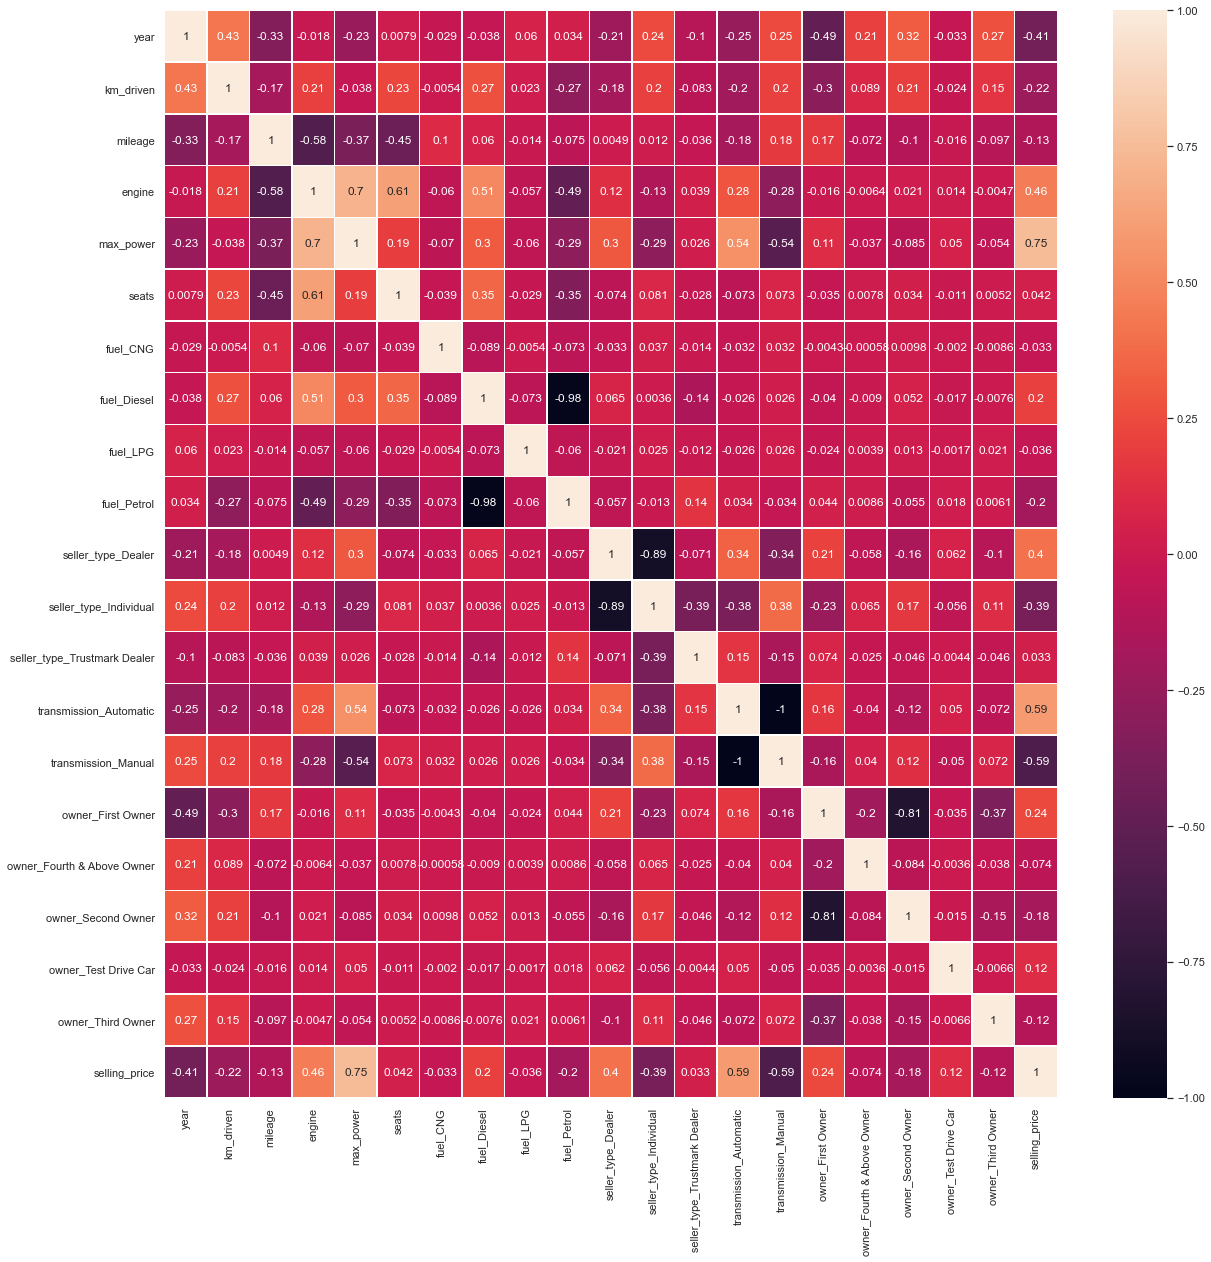

In [79]:
# convert correlation table into heatmap format, I used this to extract correlation table into .png format
fig, ax = plt.subplots(figsize=(20,20))         
sns.heatmap(df.corr(method='pearson'), annot=True, linewidths= .5, ax=ax)


In [80]:
# description of the dataframe with all features after they have been converted into dummies

df.describe()

,year,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,selling_price
count,7906.000000,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7906.00000,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7.906000e+03
mean,6.016064,6.918866e+04,19.419861,1458.708829,91.587374,5.416393,0.006577,0.543764,0.004427,0.445231,0.14002,0.830129,0.029851,0.131672,0.868328,0.659626,0.020238,0.254996,0.000632,0.064508,6.498137e+05
std,3.863695,5.679230e+04,4.036263,503.893057,35.747216,0.959208,0.080838,0.498113,0.066393,0.497023,0.34703,0.375543,0.170186,0.338155,0.338155,0.473865,0.140822,0.435887,0.025142,0.245671,8.135827e+05
min,0.000000,1.000000e+00,0.000000,624.000000,32.800000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999900e+04
25%,3.000000,3.500000e+04,16.780000,1197.000000,68.050000,5.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.700000e+05
50%,5.000000,6.000000e+04,19.300000,1248.000000,82.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.500000e+05
75%,8.000000,9.542500e+04,22.320000,1582.000000,102.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.900000e+05
max,26.000000,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+07


In [81]:
# Select feature combinations
# In the email I sent from alper.sayan@ozu.edu.tr I explained you the situation 
# about the feature selection part, in the report i used f1s,f2s,f3s to 
# explain the relevent disscussion topics

f1s = df[['year', 'engine', 'max_power', 'transmission_Automatic', 'transmission_Manual']]
f2s = df[['seats','fuel_CNG', 'fuel_LPG', 'seller_type_Trustmark Dealer',
         'owner_Fourth & Above Owner']]
f3s = df[['year', 'engine', 'max_power', 'transmission_Automatic', 'transmission_Manual'
         ,'km_driven','seller_type_Individual', 'fuel_Diesel', 'fuel_Petrol']]


f1 = df[['year', 'engine', 'max_power', 'transmission_Automatic', 'transmission_Manual']]
f2 = df[['seats', 'seller_type_Trustmark Dealer', 'seller_type_Dealer', 'seller_type_Individual',
         'owner_First Owner', 'owner_Second Owner', 'owner_Third Owner', 'owner_Test Drive Car','owner_Fourth & Above Owner']]
f3 = df[['year', 'engine', 'max_power', 'transmission_Automatic', 'transmission_Manual'
         ,'km_driven', 'fuel_Diesel', 'fuel_Petrol', 'fuel_LPG', 'fuel_CNG']]


y = df['selling_price']


In [83]:
# Split the data to training and test sets
# in the set f4 no feature sets are chosen meaning everyting but selling price is included, is there to show an overfitting case

x_train_f1, x_test_f1, y_train_f1, y_test_f1 = train_test_split(f1s, y, test_size=0.2, random_state=147)
x_train_f2, x_test_f2, y_train_f2, y_test_f2 = train_test_split(f2s, y, test_size=0.2, random_state=147)
x_train_f3, x_test_f3, y_train_f3, y_test_f3 = train_test_split(f3s, y, test_size=0.2, random_state=147)

x_train_f4, x_test_f4, y_train_f4, y_test_f4 = train_test_split(df.loc[:, df.columns != 'selling_price']
, y, test_size=0.2, random_state=147)

x_train_f1_new, x_test_f1_new, y_train_f1_new, y_test_f1_new = train_test_split(f1, y, test_size=0.2, random_state=147)
x_train_f2_new, x_test_f2_new, y_train_f2_new, y_test_f2_new = train_test_split(f2, y, test_size=0.2, random_state=147)
x_train_f3_new, x_test_f3_new, y_train_f3_new, y_test_f3_new = train_test_split(f3, y, test_size=0.2, random_state=147)


In [99]:
# Initialize min-max scaler and transform each feature by using min-max scaler
# You need to put the feature values to a certain range (in general: (0, 1)) in order to stabilize the model

scaler = MinMaxScaler(feature_range=(0, 1))

x_train_f1 = scaler.fit_transform(x_train_f1)
x_train_f2 = scaler.fit_transform(x_train_f2)
x_train_f3 = scaler.fit_transform(x_train_f3)
x_train_f4 = scaler.fit_transform(x_train_f4)

x_train_f1_new = scaler.fit_transform(x_train_f1_new)
x_train_f2_new = scaler.fit_transform(x_train_f2_new)
x_train_f3_new = scaler.fit_transform(x_train_f3_new)



In [100]:
# Initialize the linear regression models

model_f1 = LinearRegression()
model_f2 = LinearRegression()
model_f3 = LinearRegression()
model_f4 = LinearRegression()

model_f1_new = LinearRegression()
model_f2_new = LinearRegression()
model_f3_new = LinearRegression()



In [101]:
# Fit the training data to the models

model_f1.fit(x_train_f1, y_train_f1)
model_f2.fit(x_train_f2, y_train_f2)
model_f3.fit(x_train_f3, y_train_f3)
model_f4.fit(x_train_f4, y_train_f4)

model_f1_new.fit(x_train_f1_new, y_train_f1_new)
model_f2_new.fit(x_train_f2_new, y_train_f2_new)
model_f3_new.fit(x_train_f3_new, y_train_f3_new)

LinearRegression()

In [102]:
# Print the general formula of our linear regression model

def get_formula(model):
    
    _str = "y = "
    for i, m in enumerate(model.coef_):
        _str += "x_{}*{}+".format(i+1, round(m,0))
    _str += str(model.intercept_)
    return _str

print('for model f1:\n' + get_formula(model_f1))
print()
print('for model f2:\n' + get_formula(model_f2))
print()
print('for model f3:\n' + get_formula(model_f3))
print()
print('for model f4:\n' + get_formula(model_f4))
print()
print('for model f1_new:\n' + get_formula(model_f1_new))
print()
print('for model f2_new:\n' + get_formula(model_f2_new))
print()
print('for model f3_new:\n' + get_formula(model_f3_new))


for model f1:
y = x_1*-1246192.0+x_2*-191899.0+x_3*5164808.0+x_4*259956.0+x_5*-259956.0+357863.74251297204

for model f2:
y = x_1*380295.0+x_2*-326423.0+x_3*-413005.0+x_4*105518.0+x_5*-430339.0+556522.5613735698

for model f3:
y = x_1*-996763.0+x_2*-235209.0+x_3*5020072.0+x_4*228764.0+x_5*-228764.0+x_6*-2295432.0+x_7*-218023.0+x_8*-91211.0+x_9*-195599.0+697210.2873432674

for model f4:
y = x_1*-888538.0+x_2*-2121396.0+x_3*538107.0+x_4*271907.0+x_5*4721551.0+x_6*-407589.0+x_7*-12943.0+x_8*-52084.0+x_9*154254.0+x_10*-89227.0+x_11*210266.0+x_12*-48868.0+x_13*-161398.0+x_14*226379.0+x_15*-226379.0+x_16*-406186.0+x_17*-394097.0+x_18*-454768.0+x_19*1684012.0+x_20*-428961.0+621818.9178613388

for model f1_new:
y = x_1*-1246192.0+x_2*-191899.0+x_3*5164808.0+x_4*259956.0+x_5*-259956.0+357863.74251297204

for model f2_new:
y = x_1*790773.0+x_2*9.270565892667929e+18+x_3*9.270565892668658e+18+x_4*9.270565892667791e+18+x_5*2.8352045714429235e+17+x_6*2.835204571440215e+17+x_7*2.8352045714395296e+17+

In [103]:
# Scale each feature to range(0, 1)

x_test_f1 = scaler.fit_transform(x_test_f1)
x_test_f2 = scaler.fit_transform(x_test_f2)
x_test_f3 = scaler.fit_transform(x_test_f3)
x_test_f4 = scaler.fit_transform(x_test_f4)


x_test_f1_new = scaler.fit_transform(x_test_f1_new)
x_test_f2_new = scaler.fit_transform(x_test_f2_new)
x_test_f3_new = scaler.fit_transform(x_test_f3_new)


In [104]:
# Predict the values by using all test data

y_pred_f1 = model_f1.predict(x_test_f1)
y_pred_f2 = model_f2.predict(x_test_f2)
y_pred_f3 = model_f3.predict(x_test_f3)
y_pred_f4 = model_f4.predict(x_test_f4)


y_pred_f1_new = model_f1_new.predict(x_test_f1_new)
y_pred_f2_new = model_f2_new.predict(x_test_f2_new)
y_pred_f3_new = model_f3_new.predict(x_test_f3_new)


In [105]:
# Print the predicted and the actual value of the first row in test set

print("Predicted: {}, Actual: {}".format(y_pred_f1[1], y_test_f1[1]))
print('absolute difference= ' + str(y_pred_f1[1] - y_test_f1[1]))

Predicted: 321706.01076550904, Actual: 370000
absolute difference= -48293.98923449096


In [107]:
# Calculate the score of the model in test data
# as can be seen here f4 has no better explainotary power than f3 meaning in f4 we overfitted our model

score_f1 = model_f1.score(x_test_f1, y_test_f1)
score_f2 = model_f2.score(x_test_f2, y_test_f2)
score_f3 = model_f3.score(x_test_f3, y_test_f3)
score_f4 = model_f4.score(x_test_f4, y_test_f4)


print('score f1= ' + str(score_f1))
print('score f2= ' + str(score_f2))
print('score f3= ' + str(score_f3))
print('score f4= ' + str(score_f4))


score_f1_new = model_f1_new.score(x_test_f1_new, y_test_f1_new)
score_f2_new = model_f2_new.score(x_test_f2_new, y_test_f2_new)
score_f3_new = model_f3_new.score(x_test_f3_new, y_test_f3_new)

print()
print('score f1_new= ' + str(score_f1_new))
print('score f2_new= ' + str(score_f2_new))
print('score f3_new= ' + str(score_f3_new))

score f1= 0.26207647757314045
score f2= 0.014238233703244951
score f3= 0.4421516852586419
score f4= 0.4353499735565941

score f1_new= 0.26207647757314045
score f2_new= 0.1798904770054215
score f3_new= 0.4125389238810694


In [108]:
# Calculate mean squared error of predicted values

mse_f1 = mean_squared_error(y_test_f1, y_pred_f1)
mse_f2 = mean_squared_error(y_test_f2, y_pred_f2)
mse_f3 = mean_squared_error(y_test_f3, y_pred_f3)
mse_f4 = mean_squared_error(y_test_f4, y_pred_f4)

print(mse_f1)
print(mse_f2)
print(mse_f3)
print(mse_f4)


mse_f1_new = mean_squared_error(y_test_f1_new, y_pred_f1_new)
mse_f2_new = mean_squared_error(y_test_f2_new, y_pred_f2_new)
mse_f3_new = mean_squared_error(y_test_f3_new, y_pred_f3_new)
print()

print(mse_f1_new)
print(mse_f2_new)
print(mse_f3_new)

402949895448.3637
538284237585.9378
304618179620.85095
308332316568.5341

402949895448.3637
447828313508.7718
320788499089.44183


In [109]:
# Calculate absolute squared error of predicted values

mae_f1 = mean_absolute_error(y_test_f1, y_pred_f1)
mae_f2 = mean_absolute_error(y_test_f2, y_pred_f2)
mae_f3 = mean_absolute_error(y_test_f3, y_pred_f3)
mae_f4 = mean_absolute_error(y_test_f4, y_pred_f4)


print(mae_f1)
print(mae_f2)
print(mae_f3)
print(mae_f4)


mae_f1_new = mean_absolute_error(y_test_f1_new, y_pred_f1_new)
mae_f2_new = mean_absolute_error(y_test_f2_new, y_pred_f2_new)
mae_f3_new = mean_absolute_error(y_test_f3_new, y_pred_f3_new)

print()
print(mae_f1_new)
print(mae_f2_new)
print(mae_f3_new)

482242.2692989118
391275.7243367283
420324.4960253233
429026.9754955932

482242.2692989118
359970.75916561316
428343.29089770664


In [110]:
# Calculate root mean squared error of predicted values

r_mse_f1 = np.sqrt(mean_squared_error(y_test_f1, y_pred_f1))
r_mse_f2 = np.sqrt(mean_squared_error(y_test_f2, y_pred_f2))
r_mse_f3 = np.sqrt(mean_squared_error(y_test_f3, y_pred_f3))

print(r_mse_f1)
print(r_mse_f2)
print(r_mse_f3)

r_mse_f1_new = np.sqrt(mean_squared_error(y_test_f1_new, y_pred_f1_new))
r_mse_f2_new = np.sqrt(mean_squared_error(y_test_f2_new, y_pred_f2_new))
r_mse_f3_new = np.sqrt(mean_squared_error(y_test_f3_new, y_pred_f3_new))

print()
print(r_mse_f1_new)
print(r_mse_f2_new)
print(r_mse_f3_new)

634783.3452827537
733678.5655761914
551922.2586749432

634783.3452827537
669199.7560585119
566381.9374675024


In [111]:
# Calculate r2 score of predicted values

r2_score_f1 = r2_score(y_test_f1, y_pred_f1)
r2_score_f2 = r2_score(y_test_f2, y_pred_f2)
r2_score_f3 = r2_score(y_test_f3, y_pred_f3)

print(r2_score_f1)
print(r2_score_f2)
print(r2_score_f3)

r2_score_f1_new = r2_score(y_test_f1_new, y_pred_f1_new)
r2_score_f2_new = r2_score(y_test_f2_new, y_pred_f2_new)
r2_score_f3_new = r2_score(y_test_f3_new, y_pred_f3_new)

print()
print(r2_score_f1_new)
print(r2_score_f2_new)
print(r2_score_f3_new)

0.26207647757314045
0.014238233703244951
0.4421516852586419

0.26207647757314045
0.1798904770054215
0.4125389238810694


In [112]:
# printing formula for the best performing model

print(get_formula(model_f3))

y = x_1*-996763.0+x_2*-235209.0+x_3*5020072.0+x_4*228764.0+x_5*-228764.0+x_6*-2295432.0+x_7*-218023.0+x_8*-91211.0+x_9*-195599.0+697210.2873432674


Text(0, 0.5, 'y_pred')

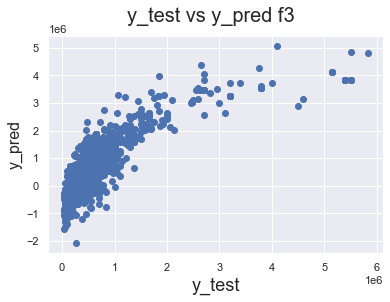

In [113]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_test_f3,y_pred_f3)
fig.suptitle('y_test vs y_pred f3', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)            

Text(0, 0.5, 'y_pred')

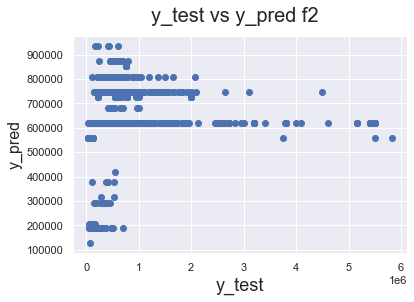

In [114]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_test_f2,y_pred_f2)
fig.suptitle('y_test vs y_pred f2', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)     

Text(0, 0.5, 'y_pred')

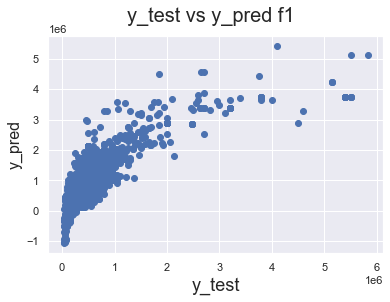

In [115]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_test_f1,y_pred_f1)
fig.suptitle('y_test vs y_pred f1', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)     

Text(0, 0.5, 'y_pred_new')

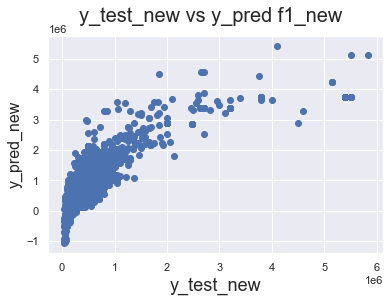

In [116]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_test_f1_new, y_pred_f1_new)
fig.suptitle('y_test_new vs y_pred f1_new', fontsize=20)              # Plot heading 
plt.xlabel('y_test_new', fontsize=18)                          # X-label
plt.ylabel('y_pred_new', fontsize=16)     

Text(0, 0.5, 'y_pred_new')

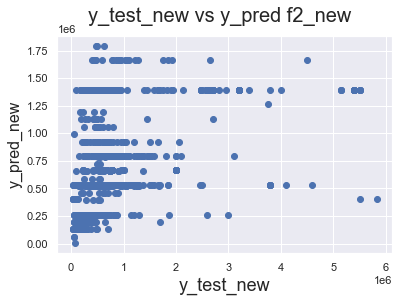

In [117]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_test_f2_new, y_pred_f2_new)
fig.suptitle('y_test_new vs y_pred f2_new', fontsize=20)              # Plot heading 
plt.xlabel('y_test_new', fontsize=18)                          # X-label
plt.ylabel('y_pred_new', fontsize=16)     

Text(0, 0.5, 'y_pred_new')

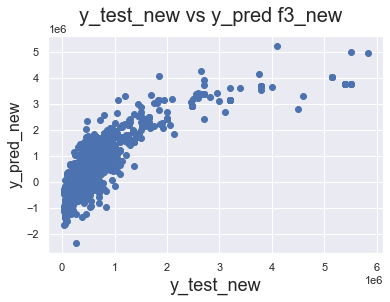

In [118]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_test_f3_new, y_pred_f3_new)
fig.suptitle('y_test_new vs y_pred f3_new', fontsize=20)              # Plot heading 
plt.xlabel('y_test_new', fontsize=18)                          # X-label
plt.ylabel('y_pred_new', fontsize=16)     